<a href="https://colab.research.google.com/github/viriditass/Papers/blob/main/Semantic_Image_Segmentation_with_Deep_Convolutional_Nets_and_Fully_Connected_CRFs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Semantic Image Segmentation with Deep Convolutional Nets and Fully Connected CRFs**

논문 링크: https://arxiv.org/abs/1412.7062

CNN은 image classification이나 object detection과 같은 Vision task에서 좋은 성능을 보여줬다. 하지만 semantic segmentation과 같이 pixel 단위로 classification하는 경우는 조밀한 예측이 필요한데, classification model을 기반으로 segmentation을 진행하면 feature-map의 크기가 줄어들기 때문에 detail한 정보를 얻기 힘들다.

따라서 본 논문에서는 이전 방식보다 훨씬 간단하며 효율적으로 조밀한 계산을 할 수 있는 hole algorithm을 제안한다.

## **Hole Algorithm**

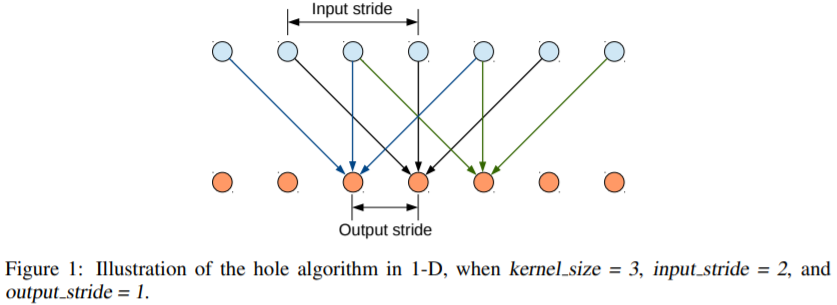

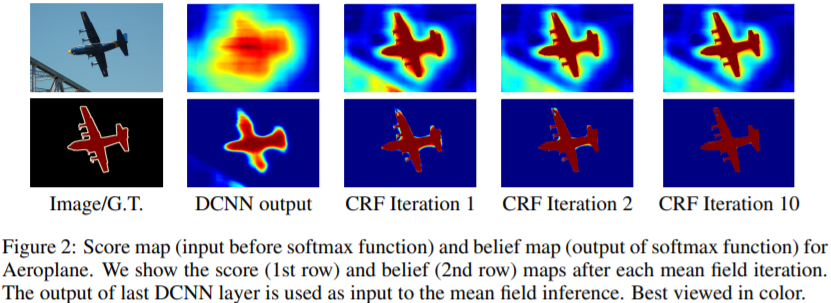

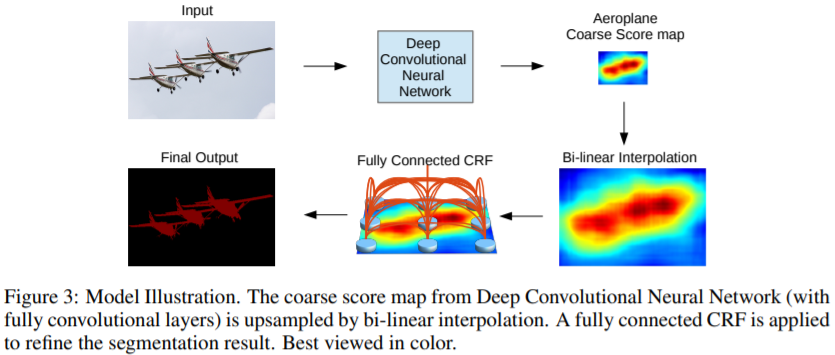

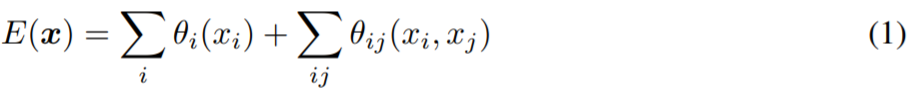